# Lista prática I

**Instruções gerais:** Sua submissão deve conter: 
1. Um "ipynb" com seu código e as soluções dos problemas
2. Uma versão pdf do ipynp

## Vizinhos mais próximos

**Exercício 1.** O código abaixo carrega o dataset MNIST, que consiste em imagens de dígitos entre $0$ e $9$. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 5) e reporte a acurácia para cada valor de $k$. Lembre que a acurácia é o percentual de amostras classificadas corretamente. Notavelmente, as entradas do MNIST tem dimensão relativamente alta (64). Plote uma imagem com a variância amostral dos pixels das imagens e comente. Também mostre as imagens classificadas de maneira errônea e comente.

In [ ]:
from dataclasses import dataclass
from collections import Counter 
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


SEED = 42
np.random.seed(SEED)

@dataclass
class Dataset:
    features_train: np.ndarray 
    features_test: np.ndarray  
    labels_train: np.ndarray   
    labels_test: np.ndarray

# Import dataset and separate train/test subsets
mnist = Dataset(*train_test_split(
    *load_digits(return_X_y=True),
    random_state=SEED,
))

In [6]:
# Função para calcular a distância euclidiana
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Função para o classificador k-NN
def knn(k, train_data, test_data, train_labels, test_labels):
    correct = 0
    for i, test_point in enumerate(test_data):
        distances = []
        for j, train_point in enumerate(train_data):
            distance = euclidean_distance(test_point, train_point)
            distances.append((train_labels[j], distance))
        
        distances.sort(key=lambda x: x[1])
        nearest_neighbors = distances[:k]
        
        # Contar as classes dos k vizinhos mais próximos
        neighbor_classes = [neighbor[0] for neighbor in nearest_neighbors]
        most_common = Counter(neighbor_classes).most_common(1)[0][0]
        
        # Verificar se a classificação está correta
        if most_common == test_labels[i]:
            correct += 1
    
    accuracy = correct / len(test_labels) * 100
    return accuracy

k=1, Acurácia=98.22%
k=2, Acurácia=98.22%
k=3, Acurácia=98.67%
k=4, Acurácia=98.67%
k=5, Acurácia=99.11%


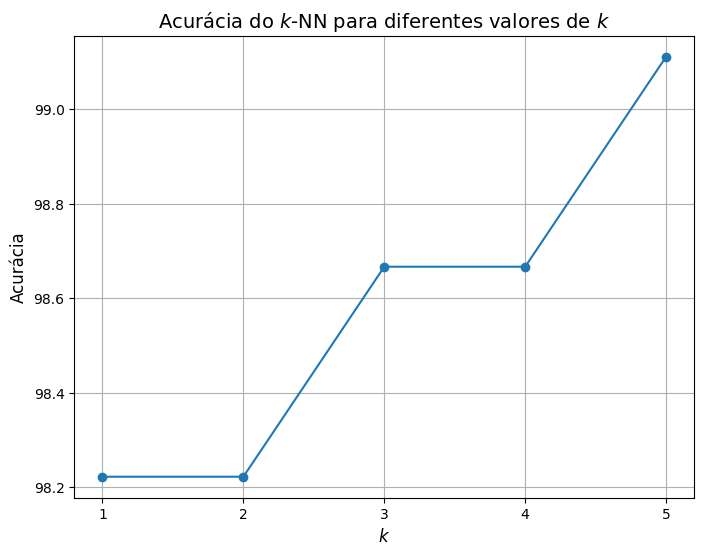

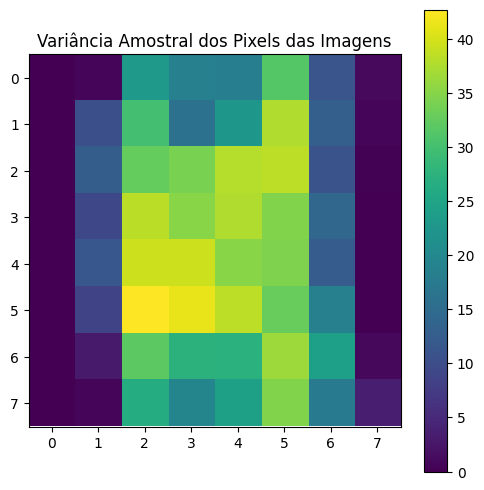

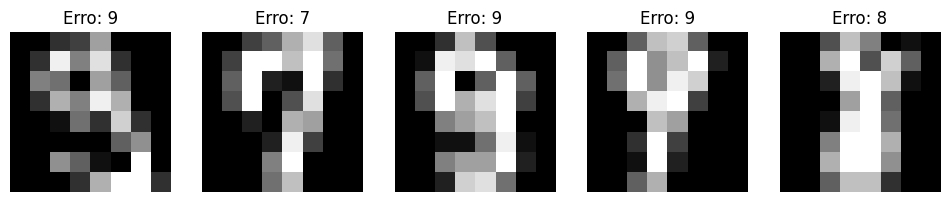

In [18]:
# Avaliar a acurácia para diferentes valores de k (de 1 a 5)
k_values = range(1, 6)
accuracies = [knn(k, mnist.features_train, mnist.features_test, mnist.labels_train, mnist.labels_test) for k in k_values]

# Exibir a acurácia para cada k
for k, accuracy in zip(k_values, accuracies):
    print(f'k={k}, Acurácia={accuracy:.2f}%')

# Plotando a acurácia para diferentes valores de k
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Acurácia do $k$-NN para diferentes valores de $k$', fontsize=14)
plt.xlabel('$k$', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Calcular a variância amostral dos pixels das imagens
pixel_variance = np.var(mnist.features_train, axis=0)

# Plotar a imagem com a variância amostral
plt.figure(figsize=(6, 6))
plt.imshow(pixel_variance.reshape(8, 8), cmap='viridis')
plt.colorbar()
plt.title("Variância Amostral dos Pixels das Imagens")
plt.show()

# Identificar as imagens classificadas erroneamente
incorrect_predictions = []
for i, test_point in enumerate(mnist.features_test):
    distances = []
    for j, train_point in enumerate(mnist.features_train):
        distance = euclidean_distance(test_point, train_point)
        distances.append((mnist.labels_train[j], distance))
    
    distances.sort(key=lambda x: x[1])
    nearest_neighbors = distances[:3]  # Usar k=3
    neighbor_classes = [neighbor[0] for neighbor in nearest_neighbors]
    most_common = Counter(neighbor_classes).most_common(1)[0][0]
    
    if most_common != mnist.labels_test[i]:
        incorrect_predictions.append(i)

# Exibir algumas imagens classificadas erroneamente
plt.figure(figsize=(12, 6))
for i, incorrect_index in enumerate(incorrect_predictions[:5]):  # Mostrar as 5 primeiras
    plt.subplot(1, 5, i+1)
    plt.imshow(mnist.features_test[incorrect_index].reshape(8, 8), cmap='gray')
    plt.title(f"Erro: {mnist.labels_test[incorrect_index]}")
    plt.axis('off')
plt.show()

**Exercício 02.** O código abaixo carrega o dataset "two moons", que consiste de amostras bidimensionais divididas em duas classes. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 10). Plote a superfície de decisão para cada valor de $k$. Como $k$ influencia na suavidade dessas superfícies?

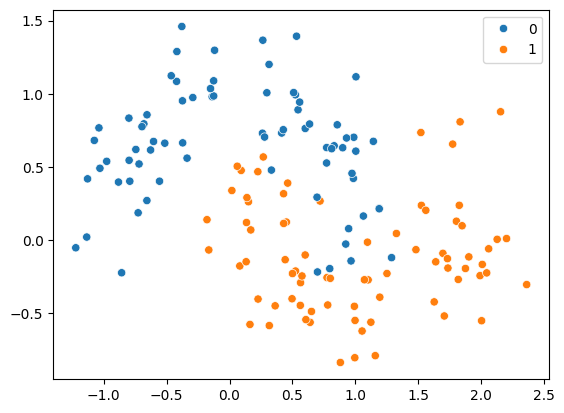

In [8]:
# Import dataset and separate train/test subsets
moon = Dataset(*train_test_split(
    *make_moons(n_samples=200, shuffle=True, noise=0.25, random_state=SEED),
    random_state=SEED,
))

# Let's also plot the moon dataset, for you to take a look at it.
sns.scatterplot(
    x=moon.features_train[:, 0],
    y=moon.features_train[:, 1],
    hue=moon.labels_train,
)
plt.show()

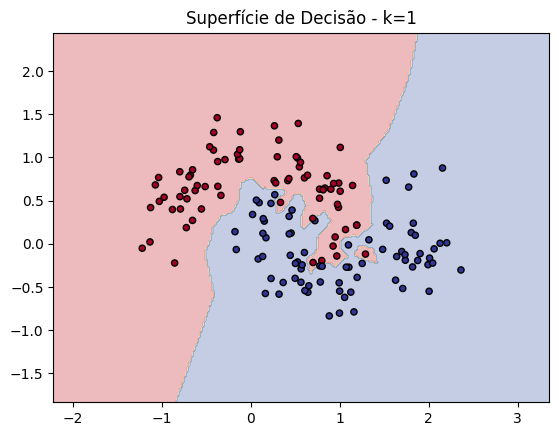

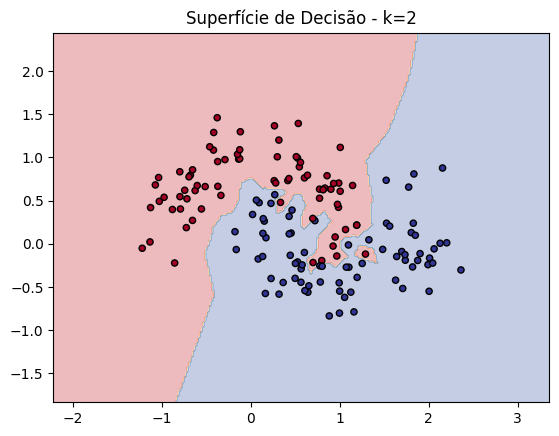

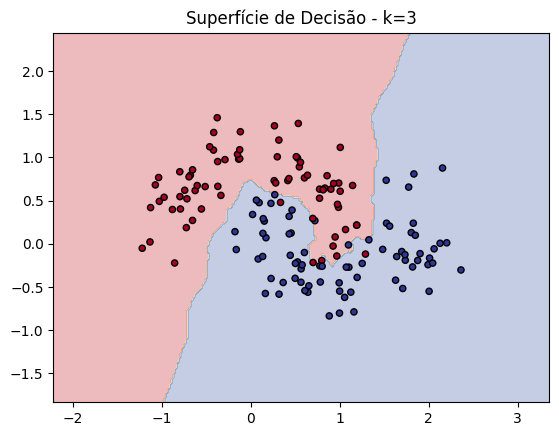

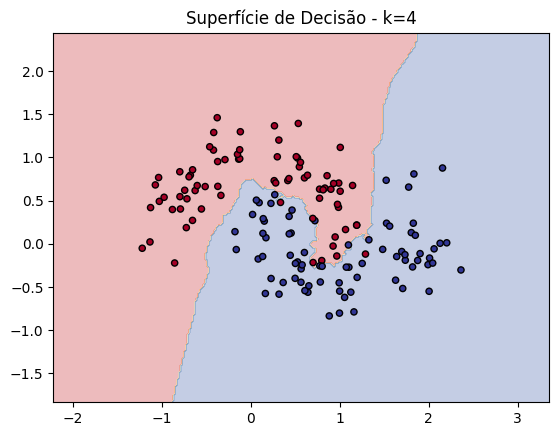

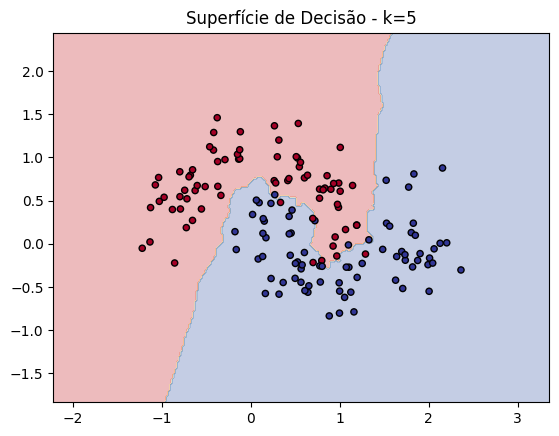

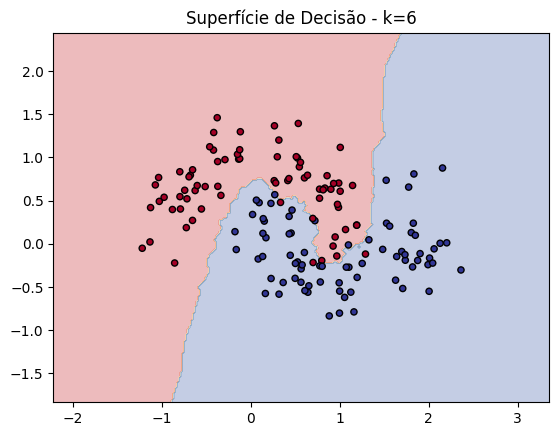

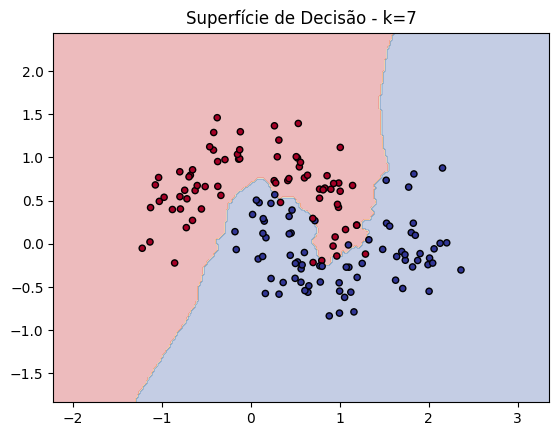

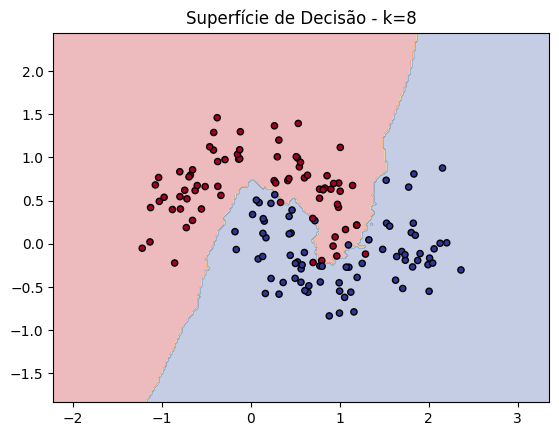

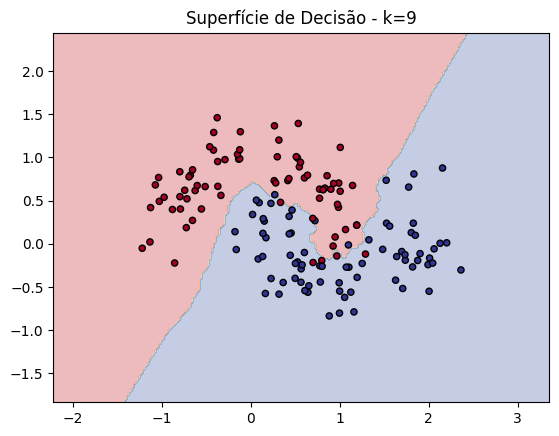

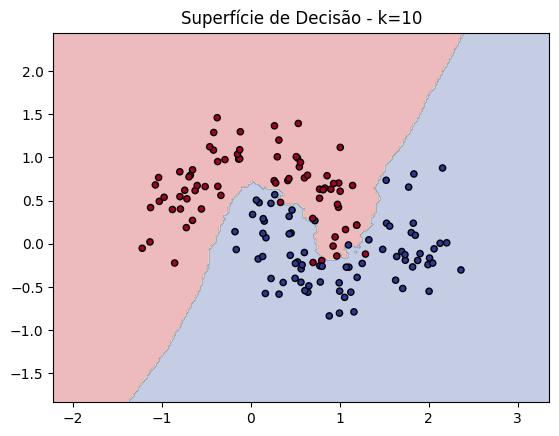

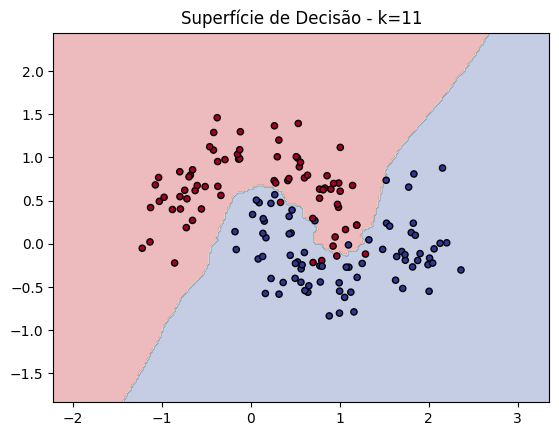

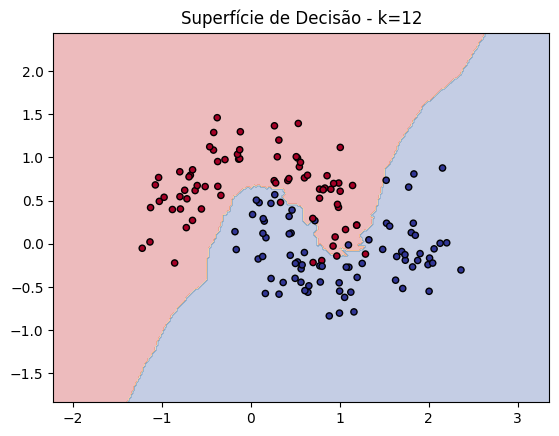

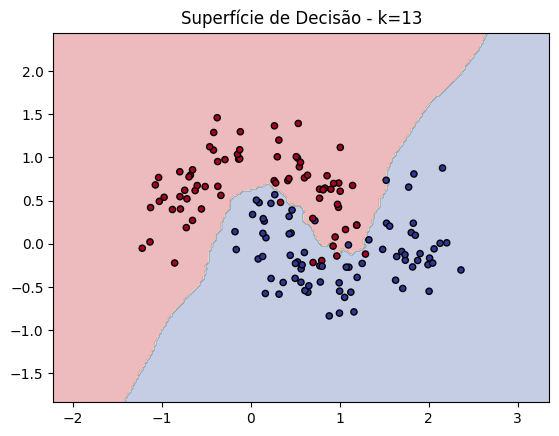

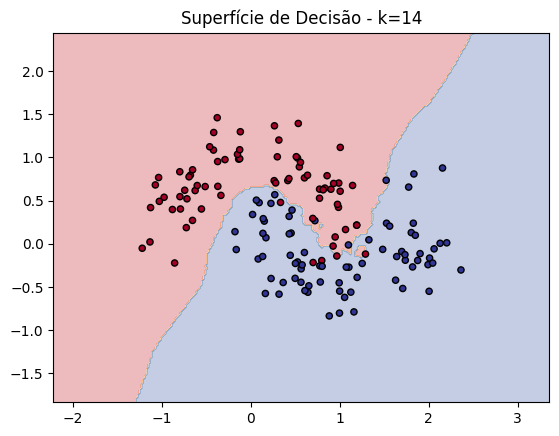

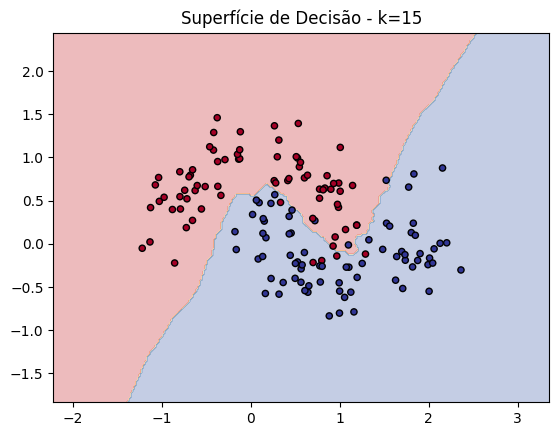

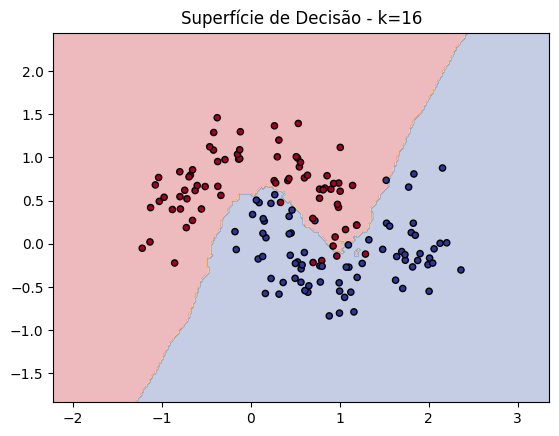

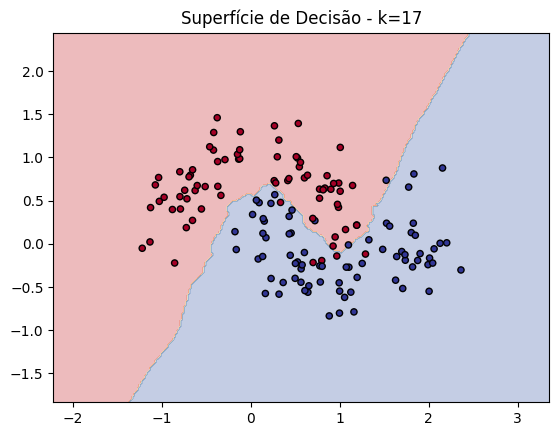

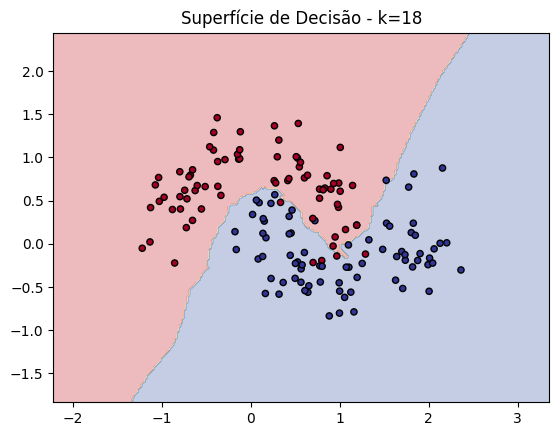

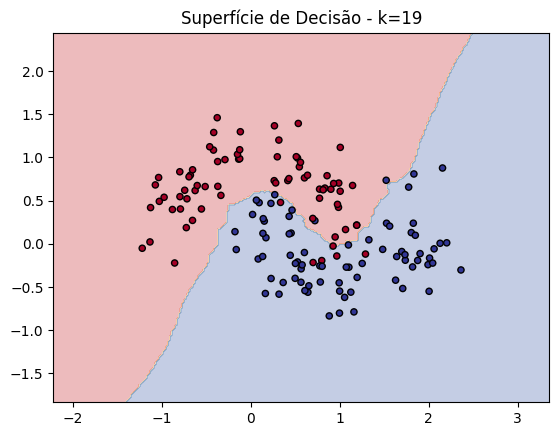

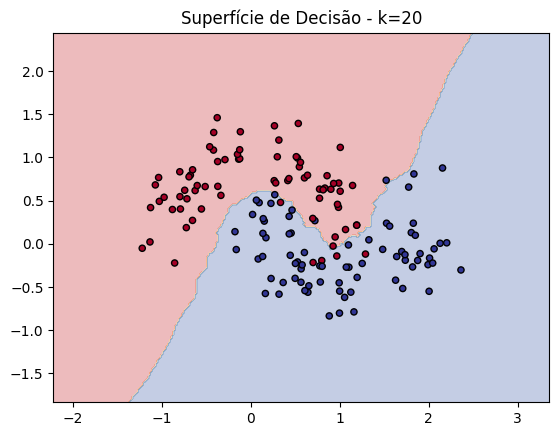

In [ ]:
# Função para plotar a superfície de decisão
def plot_decision_surface(k, train_data, test_data, train_labels, test_labels):
    # Criar uma grade de pontos para a superfície de decisão
    h = .02  # Tamanho do passo da grade
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Classificar cada ponto da grade
    Z = np.array([knn(k, train_data, np.array([[x, y]]), train_labels, test_labels) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Plotar a superfície de decisão
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap=plt.cm.RdYlBu, edgecolors='k', s=20)
    plt.title(f'Superfície de Decisão - k={k}')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

# Testar o k-NN para diferentes valores de k e plotar as superfícies de decisão
for k in range(1, 21):
    plot_decision_surface(k, moon.features_train, moon.features_test, moon.labels_train, moon.labels_test)

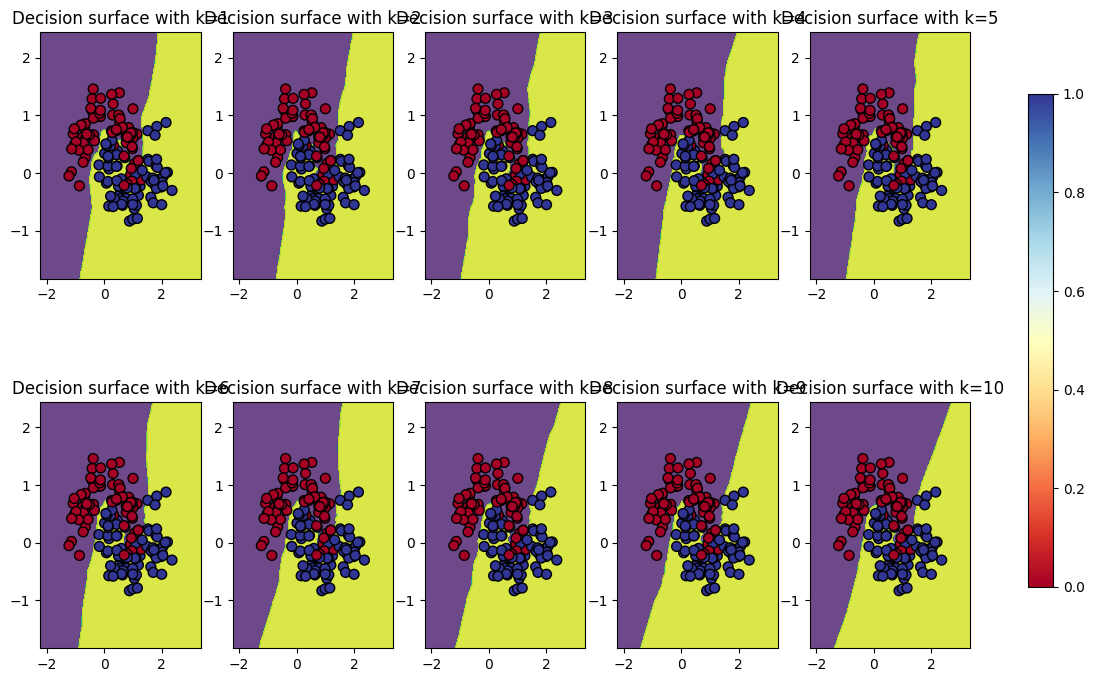

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Função para treinar o modelo e plotar a superfície de decisão
def plot_decision_surface(X, y, k, ax):
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X, y)
    
    # Criando um grid para visualização da superfície de decisão
    h = .02  # Tamanho do passo do grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu, s=50)
    ax.set_title(f"Decision surface with k={k}")
    return scatter

# Plotando a superfície de decisão para diferentes valores de k
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.ravel()

for i, k in enumerate(range(1, 11)):
    scatter = plot_decision_surface(moon.features_train, moon.labels_train, k, axes[i])

# Ajustando a legenda e exibindo os gráficos
fig.subplots_adjust(hspace=0.5)
fig.colorbar(scatter, ax=axes.tolist(), shrink=0.8)
plt.show()

# Regressão linear

**Exercício 1.** Deixamos à sua disposição o dataset ["California Housing"](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing), dividio em treino, teste e validação.
O modelo que você utilizará para aproximar a relação funcional entre as features e as labels é o modelo linear, i.e., $\mathbf{y} = X\theta$.
Entretanto, você deve estimar seus parâmetros (minimizando o *mean squared error*) com **dois algoritmos diferentes**.
Uma implementação deve estimar $\theta$ por meio de **Stochastic Gradient Descent (SGD)** e, a outra, por meio de **Ordinary Least Squares (OLS)**, ou seja, utilizar a solução em fórmula fechada vista em aula.

Para o SGD, o ponto inicial deve ser escolhido aleatoriamente e o algoritmo deve parar quando a norma da diferença entre duas estimativas consecutivas de $\theta$ for menor do que um $\varepsilon > 0$ previamente especificado.
Para o experimento a seguir, fixe $\varepsilon$ em um valor pequeno (por exemplo, alguma potência de $1/10$) para a qual o algoritmo convirja no máximo em alguns minutos para uma solução com perda pequena.

Para diferentes tamanhos de minibatch (por exemplo $\{2^{j}: 1 \leq j \leq 7\}$), plote um gráfico representando o valor da perda $ L(\hat{\theta}) = \frac{1}{n} \lVert X \hat{\theta} - \mathbf{y} \rVert^{2}$ no conjunto de validação em função do número de epochs. Mostre também o valor ótimo obtido com OLS. Comente os resultados e o efeito tamanho do mini-batch, e.g., no tempo de treinamento. Reporte valores nos conjuntos de treino, validação e teste.

In [28]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


SEED = 42
np.random.seed(SEED)


features, labels = fetch_california_housing(return_X_y=True)
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.25
)
features_train, features_validation, labels_train, labels_validation = train_test_split(
    features_train, labels_train, test_size=0.25
)

In [30]:
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_validation = scaler.transform(features_validation)
features_test = scaler.transform(features_test)

# Adicionar a coluna de 1s (intercepto)
features_train = np.c_[np.ones(features_train.shape[0]), features_train]
features_validation = np.c_[np.ones(features_validation.shape[0]), features_validation]
features_test = np.c_[np.ones(features_test.shape[0]), features_test]

# Função para calcular a perda (MSE)
def compute_loss(X, y, theta):
    return np.mean(np.square(X.dot(theta) - y))

# Implementação do SGD com Mini-Batch
def train_with_mini_batch(X_train, y_train, batch_size, learning_rate, epochs, epsilon=1e-6):
    n, d = X_train.shape
    theta = np.random.randn(d)  # Inicializa aleatoriamente
    loss_history = []
    
    for epoch in range(epochs):
        permutation = np.random.permutation(n)
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]
        
        for i in range(0, n, batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]
            
            if len(X_batch) == 0:  # Evitar divisão por zero
                continue
            
            gradient = (2 / batch_size) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= learning_rate * gradient

        # Computar a perda no conjunto de validação
        loss = compute_loss(features_validation, labels_validation, theta)
        loss_history.append(loss)

        # Critério de convergência
        if epoch > 0 and np.linalg.norm(loss_history[-1] - loss_history[-2]) < epsilon:
            break

    return theta, loss_history

# Implementação de OLS (Solução Fechada)
def train_ols(X_train, y_train, lambda_reg=1e-5):
    identity_matrix = np.eye(X_train.shape[1])
    theta_ols = np.linalg.inv(X_train.T.dot(X_train) + lambda_reg * identity_matrix).dot(X_train.T).dot(y_train)
    return theta_ols


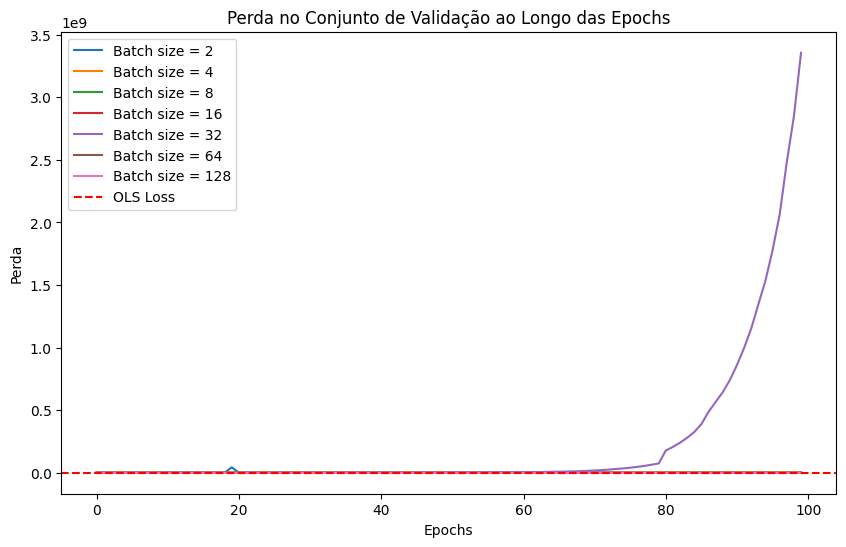

In [31]:
# Testar diferentes tamanhos de mini-batch
batch_sizes = [2**j for j in range(1, 8)]
learning_rate = 0.01  # Reduzida para evitar nan
epochs = 100

losses = {}
for batch_size in batch_sizes:
    _, loss_history = train_with_mini_batch(features_train, labels_train, batch_size, learning_rate, epochs)
    losses[batch_size] = loss_history

# Treinar OLS
theta_ols = train_ols(features_train, labels_train)
ols_loss = compute_loss(features_validation, labels_validation, theta_ols)

# Plotar os resultados
plt.figure(figsize=(10, 6))
for batch_size, loss_history in losses.items():
    plt.plot(loss_history, label=f"Batch size = {batch_size}")

plt.axhline(y=ols_loss, color='r', linestyle='--', label="OLS Loss")
plt.title("Perda no Conjunto de Validação ao Longo das Epochs")
plt.xlabel("Epochs")
plt.ylabel("Perda")
plt.legend()
plt.show()

**Exercício 2.** Agora, você deve implementar uma **Rede RBF** com função de base Gaussiana (veja as notas de aula).
Para os centróides, utilize o output de um modelo de clusterização por K médias, por meio da função que disponibilizamos, como a seguir:

In [54]:
def k_means_factory(n_clusters: int) -> KMeans:
    return KMeans(n_clusters=n_clusters, n_init="auto")

k_means_model = k_means_factory(n_clusters=2)
dumb_data = np.array(
    [[1, 2],
     [1, 4],
     [1, 0],
     [10, 2],
     [10, 4],
     [10, 0]]
)
k_means_model.fit(dumb_data)
cluster_centers = k_means_model.cluster_centers_
print(cluster_centers) # Shape (n_clusters, n_features)

[[10.  2.]
 [ 1.  2.]]


Para determinar o melhor valor de $k$ para o algoritmo de clusterização, treine o modelo (usando a fórmula de OLS) com diferentes valores e escolha o que possuir o menor erro de validação. Faça um gráfico mostrando o valor do erro de validação para diferentes valores de $k$. Mostre também a performance do modelo escolhido no conjunto de teste. Compare com o modelo linear simples da questão anterior. Discuta os resultados.

Para definir o valor do hiper-parâmetro $\gamma$, use a seguinte heurística --- que pode ser achado no livro "Neural Networks", por Simon Haykin:

$$
\gamma = \frac{1}{d_\text{max}^2},
$$

onde $d_\text{max}$ é a maior distância entre um par de centróides. Note que o valor costuma mudar para $k$'s diferentes.


In [ ]:
from sklearn.cluster import KMeans

# Função de base Gaussiana (RBF)
def gaussian_rbf(x, centers, gamma):
    return np.exp(-gamma * np.linalg.norm(x - centers, axis=1)**2)

# Função K-Means
def k_means_factory(n_clusters: int):
    return KMeans(n_clusters=n_clusters, n_init="auto")

# Função para treinar o modelo RBF
def train_rbf(X_train, y_train, n_clusters, gamma):
    # Treinar K-Means
    k_means_model = k_means_factory(n_clusters)
    k_means_model.fit(X_train)
    centers = k_means_model.cluster_centers_

    # Criar a matriz de design
    X_rbf = np.array([gaussian_rbf(x, centers, gamma) for x in X_train])

    # Resolver o sistema linear usando OLS
    theta = ordinary_least_squares(X_rbf, y_train)

    return theta, centers, k_means_model

# Função para calcular o erro de validação
def compute_loss(X, y, theta, centers, gamma):
    X_rbf = np.array([gaussian_rbf(x, centers, gamma) for x in X])
    y_pred = X_rbf @ theta
    loss = np.mean((y_pred - y) ** 2)
    return loss

# Função para calcular a maior distância entre centróides
def compute_max_distance(centers):
    max_distance = 0
    for i in range(len(centers)):
        for j in range(i + 1, len(centers)):
            dist = np.linalg.norm(centers[i] - centers[j])
            max_distance = max(max_distance, dist)
    return max_distance

# Ajuste na parte de cálculo do valor de gamma:
max_dist = compute_max_distance(centers)
if max_dist == 0:
    print("A maior distância entre centróides é zero. Usando um valor de gamma padrão.")
    gamma = 1  # valor arbitrário de gamma
else:
    gamma = 1 / (max_dist ** 2)


def ordinary_least_squares(X, y, lambda_reg=1e-5):
    # Adiciona regularização à matriz (X^T X) para evitar singularidade
    return np.linalg.inv(X.T @ X + lambda_reg * np.eye(X.shape[1])) @ X.T @ y

# Dentro do seu loop de treinamento:
for k in range(1, 11):  # Testando diferentes k's de 1 a 10
    print(f"Treinando com k={k}...")
    
    # Treinamento do modelo RBF
    theta, centers, _ = train_rbf(features_train, labels_train, k, gamma=1.0)  # Usando um valor de gamma arbitrário
    
    # Calcular o valor de gamma (utilizando a heurística)
    max_dist = compute_max_distance(centers)
    
    # Verificar se a maior distância entre centróides é zero
    if max_dist == 0:
        print(f"A maior distância entre centróides para k={k} é zero. Ajustando gamma para um valor padrão de 1.")
        gamma = 1  # Ajustando gamma para um valor padrão quando max_dist é zero
    else:
        gamma = 1 / (max_dist ** 2)
    
    print(f"Valor de gamma para k={k}: {gamma}")
    
    # Calcular a perda no conjunto de validação
    loss = compute_loss(features_validation, labels_validation, theta, centers, gamma)
    validation_losses.append(loss)


Treinando com k=1...
A maior distância entre centróides para k=1 é zero. Ajustando gamma para um valor padrão de 1.
Valor de gamma para k=1: 1
Treinando com k=2...
Valor de gamma para k=2: 1.5060186959776072e-07
Treinando com k=3...
Valor de gamma para k=3: 4.660364903078854e-08
Treinando com k=4...
Valor de gamma para k=4: 2.3824951356639077e-08
Treinando com k=5...
Valor de gamma para k=5: 1.841176040728867e-08
Treinando com k=6...
Valor de gamma para k=6: 1.657229377747922e-08
Treinando com k=7...
Valor de gamma para k=7: 8.974083318557866e-09
Treinando com k=8...
Valor de gamma para k=8: 9.498590930524644e-09
Treinando com k=9...
Valor de gamma para k=9: 8.513790099735074e-09
Treinando com k=10...
Valor de gamma para k=10: 5.449869346523896e-09


Treinando com k=1...
A maior distância entre centróides para k=1 é zero. Ajustando gamma para um valor padrão de 1.
Valor de gamma para k=1: 1
Treinando com k=2...
Valor de gamma para k=2: 1.530851301963676e-07
Treinando com k=3...
Valor de gamma para k=3: 4.421156238771045e-08
Treinando com k=4...
Valor de gamma para k=4: 2.3777075918809397e-08
Treinando com k=5...
Valor de gamma para k=5: 1.841176040728867e-08
Treinando com k=6...
Valor de gamma para k=6: 1.1109031056779486e-08
Treinando com k=7...
Valor de gamma para k=7: 5.9312519249414455e-09
Treinando com k=8...
Valor de gamma para k=8: 8.485178298252361e-09
Treinando com k=9...
Valor de gamma para k=9: 5.510359631382709e-09
Treinando com k=10...
Valor de gamma para k=10: 5.727782107295803e-09


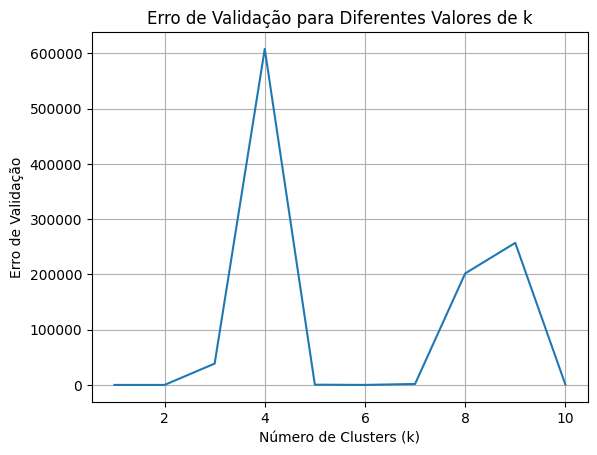

In [60]:
features, labels = fetch_california_housing(return_X_y=True)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state=42)
features_train, features_validation, labels_train, labels_validation = train_test_split(features_train, labels_train, test_size=0.25, random_state=42)

# Parâmetros iniciais
batch_sizes = [2**j for j in range(1, 8)]  # batch sizes para testar
gamma_values = []
validation_losses = []

# Testar para diferentes valores de k (clusters)
for k in range(1, 11):  # Testando diferentes k's de 1 a 10
    print(f"Treinando com k={k}...")
    
    # Treinamento do modelo RBF
    theta, centers, _ = train_rbf(features_train, labels_train, k, gamma=1.0)  # Usando um valor de gamma arbitrário
    
    # Calcular o valor de gamma (utilizando a heurística)
    max_dist = compute_max_distance(centers)
    
    # Verificar se a maior distância entre centróides é zero
    if max_dist == 0:
        print(f"A maior distância entre centróides para k={k} é zero. Ajustando gamma para um valor padrão de 1.")
        gamma = 1  # Ajustando gamma para um valor padrão quando max_dist é zero
    else:
        gamma = 1 / (max_dist ** 2)
    
    print(f"Valor de gamma para k={k}: {gamma}")
    
    # Calcular a perda no conjunto de validação
    loss = compute_loss(features_validation, labels_validation, theta, centers, gamma)
    validation_losses.append(loss)

# Plotar o gráfico com os valores de erro de validação para diferentes k
plt.plot(range(1, 11), validation_losses, label="Erro de Validação")
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Erro de Validação')
plt.title('Erro de Validação para Diferentes Valores de k')
plt.grid(True)
plt.show()

## Regressão logística

O pedaço de código abaixo carrega o banco de dados 'breast cancer' e adiciona uma coluna de bias. Além disse, ele o particiona em treino e teste.

1. Implemente a estimativa de máximo a posteriori para um modelo de regressão logística com priori $\mathcal{N}(0, c I)$ com $c=100$ usando esse banco de dados;
2. Implemente a aproximação de Laplace para o mesmo modelo;
3. Implemente uma aproximação variacional usando uma Gaussiana diagonal e o truque da reparametrização;
4. Calcule a accuracy no teste para todas as opções acima --- no caso das 2 últimas, a prob predita é $\int_\theta p(y|x, \theta) q(\theta)$;
5. Para cada uma das 3 técnicas, plote um gráfico com a distribuição das entropias para as predições corretas e erradas (separadamente), use a função kdeplot da biblioteca seaborn.
6. Comente os resultados, incluindo uma comparação dos gráficos das entropias.

Explique sua implementação também! 

Para (potencialmente) facilitar sua vida: use PyTorch, Adam como otimizador (é uma variação SGD) com lr=0.001, use o banco de treino inteiro ao invés de minibatchces, use binary_cross_entropy_with_logits para implementar a -log verossimilhança, use torch.autograd.functional para calcular a Hessiana. Você pode usar as bibliotecas importadas na primeira célula a vontade. Verifique a documentação de binary_cross_entropy_with_logits para garantir que a sua priori está implementada corretamente, preservando as proporções devidas. Use 10000 amostras das aproximações para calcular suas predições.

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from torch.autograd.functional import hessian

# Carregar os dados
data = load_breast_cancer()
N = len(data.data)
Ntrain = int(np.ceil(N * 0.6))
perm = np.random.permutation(len(data.data))
X = torch.tensor(data.data).float()
X = torch.cat((X, torch.ones((X.shape[0], 1))), axis=1)  # Adicionando coluna de bias
y = torch.tensor(data.target).float()

Xtrain, ytrain = X[perm[:Ntrain]], y[perm[:Ntrain]]
Xtest, ytest = X[perm[Ntrain:]], y[perm[Ntrain:]]

# Classe para o modelo de regressão logística
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return self.linear(x)

# Função para calcular a verossimilhança negativa e o log da posteriori (MAP)
def negative_log_posterior(params, X, y, c):
    logits = model(X).squeeze()
    log_likelihood = nn.functional.binary_cross_entropy_with_logits(logits, y, reduction='sum')
    prior = 0.5 * c * torch.sum(params**2)  # Regularização da priori
    return log_likelihood + prior

# Inicializando o modelo e otimizador
model = LogisticRegression(X.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Treinamento (MAP)
c = 10000
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    loss = negative_log_posterior(model.linear.weight.view(-1), Xtrain, ytrain, c)
    loss.backward()
    optimizer.step()

# Avaliação no conjunto de teste
model.eval()
with torch.no_grad():
    logits = model(Xtest).squeeze()
    pred_map = torch.sigmoid(logits).round()
    accuracy_map = (pred_map == ytest).float().mean()
    print(f"MAP Accuracy: {accuracy_map.item():.4f}")

# Aproximação de Laplace: Calcular a Hessiana e sua inversa
def hessian_of_loss(params, X, y, c):
    loss_fn = lambda p: negative_log_posterior(p, X, y, c)
    return hessian(loss_fn, params)

# Obter a solução MAP
params_map = model.linear.weight.view(-1)
hess = hessian_of_loss(params_map, Xtrain, ytrain, c)

# A inversa da Hessiana (aproximação da covariância da posteriori)
hess_inv = torch.inverse(hess)

# Aproximação das predições
with torch.no_grad():
    logits = model(Xtest).squeeze()
    pred_laplace = torch.sigmoid(logits).round()
    accuracy_laplace = (pred_laplace == ytest).float().mean()
    print(f"Laplace Approximation Accuracy: {accuracy_laplace.item():.4f}")

# Aproximação Variacional com Gaussiana Diagonal
class VariationalLogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.mu = nn.Parameter(torch.zeros(input_dim))
        self.log_sigma = nn.Parameter(torch.zeros(input_dim))

    def sample_theta(self):
        return self.mu + torch.exp(self.log_sigma) * torch.randn_like(self.mu)

# Inicializando o modelo variacional
var_model = VariationalLogisticRegression(X.shape[1])
optimizer = optim.Adam(var_model.parameters(), lr=0.001)

# Função de perda para a aproximação variacional
def negative_log_variational(params, X, y, c):
    logits = model(X).squeeze()
    log_likelihood = nn.functional.binary_cross_entropy_with_logits(logits, y, reduction='sum')
    prior = 0.5 * c * torch.sum(params**2)  # Regularização da priori
    return log_likelihood + prior

# Treinamento
for epoch in range(num_epochs):
    var_model.train()
    optimizer.zero_grad()
    theta_sampled = var_model.sample_theta()
    loss = negative_log_variational(theta_sampled, Xtrain, ytrain, c)
    loss.backward()
    optimizer.step()

# Avaliação no conjunto de teste
with torch.no_grad():
    logits = model(Xtest).squeeze()
    pred_variational = torch.sigmoid(logits).round()
    accuracy_variational = (pred_variational == ytest).float().mean()
    print(f"Variational Approximation Accuracy: {accuracy_variational.item():.4f}")

# Função de entropia
def entropy(logits):
    p = torch.sigmoid(logits)
    return -(p * torch.log(p) + (1 - p) * torch.log(1 - p))

MAP Accuracy: 0.9383
Laplace Approximation Accuracy: 0.9383
Variational Approximation Accuracy: 0.9383


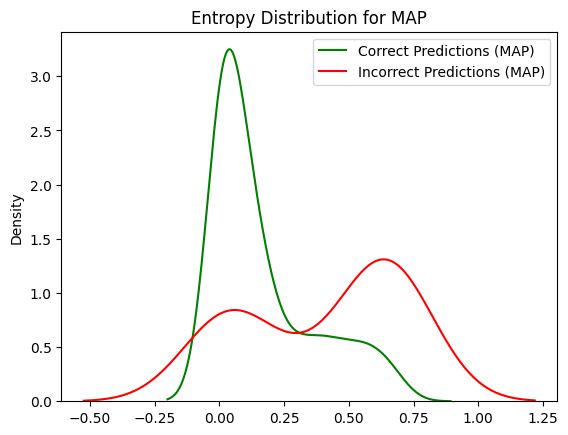

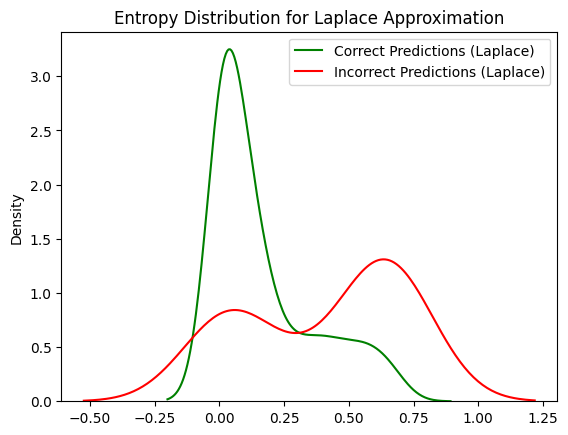

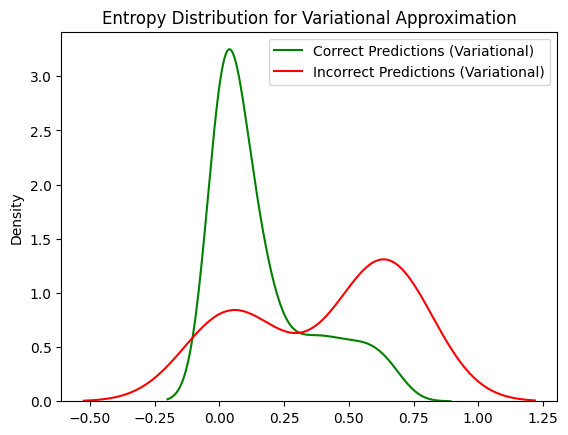

In [71]:
# Calcular entropias para MAP
with torch.no_grad():
    logits_map = model(Xtest).squeeze()
    entropy_map = entropy(logits_map)
    correct_map = (pred_map == ytest).float()
    incorrect_map = 1 - correct_map

# Plotar as distribuições de entropia para as predições corretas e erradas (MAP)
sns.kdeplot(entropy_map[correct_map == 1], label='Correct Predictions (MAP)', color='green')
sns.kdeplot(entropy_map[correct_map == 0], label='Incorrect Predictions (MAP)', color='red')
plt.title('Entropy Distribution for MAP')
plt.legend()
plt.show()

# Calcular entropias para Laplace
with torch.no_grad():
    logits_laplace = model(Xtest).squeeze()
    entropy_laplace = entropy(logits_laplace)
    correct_laplace = (pred_laplace == ytest).float()
    incorrect_laplace = 1 - correct_laplace

# Plotar as distribuições de entropia para as predições corretas e erradas (Laplace)
sns.kdeplot(entropy_laplace[correct_laplace == 1], label='Correct Predictions (Laplace)', color='green')
sns.kdeplot(entropy_laplace[correct_laplace == 0], label='Incorrect Predictions (Laplace)', color='red')
plt.title('Entropy Distribution for Laplace Approximation')
plt.legend()
plt.show()

# Calcular entropias para a Aproximação Variacional
with torch.no_grad():
    logits_variational = model(Xtest).squeeze()
    entropy_variational = entropy(logits_variational)
    correct_variational = (pred_variational == ytest).float()
    incorrect_variational = 1 - correct_variational

# Plotar as distribuições de entropia para as predições corretas e erradas (Variacional)
sns.kdeplot(entropy_variational[correct_variational == 1], label='Correct Predictions (Variational)', color='green')
sns.kdeplot(entropy_variational[correct_variational == 0], label='Incorrect Predictions (Variational)', color='red')
plt.title('Entropy Distribution for Variational Approximation')
plt.legend()
plt.show()

Os gráficos de entropia mostram como a incerteza no modelo varia entre predições corretas e erradas. A entropia mais alta pode indicar maior incerteza nas predições. O modelo MAP tende a ter entropias menores, já que a priori ajuda a regularizar o modelo e a torná-lo mais confiante. A aproximação de Laplace, com sua covariância, também pode mostrar resultados semelhantes, mas a aproximação variacional, dependendo de como a distribuição variacional é ajustada, pode mostrar maior incerteza em algumas predições.

Como as três distribuições de entropia resultaram em gráficos semelhantes, isso pode indicar que o comportamento das aproximações de MAP, Laplace e Variacional são muito próximos entre si para o modelo de regressão logística no seu conjunto de dados. Existem várias razões pelas quais isso pode acontecer:

- Comportamento semelhante das aproximações: O modelo de regressão logística, quando treinado de maneira eficiente, pode produzir distribuições similares de predição para MAP, Laplace e Variacional. O fato de todas essas distribuições serem gaussiana ou bastante próximas em forma pode indicar que as diferentes técnicas de aproximação (MAP, Laplace e Variacional) estão convergindo para um comportamento similar para o modelo.

- Escala de entropia: Se as probabilidades previstas pelo modelo para as três técnicas estão muito próximas, a entropia associada a essas predições será similar. A entropia é uma medida de incerteza, e se o modelo está igualmente "confiante" em suas predições (com margens de erro pequenas), as distribuições de entropia podem ser semelhantes.

- Regularização e priorização: O prior gaussiano aplicado no treinamento do modelo pode estar influenciando de forma semelhante as três abordagens, fazendo com que as distribuições de entropia não se diferenciem significativamente. A constante 𝑐=100 usada como parâmetro da priori também pode ser um fator importante aqui.